**Thinkful - Challenge 2.3.4 - Iterate and Evaluate Your Classifier**

**#1 - Using POSITIVE keywords to predict score of Amazon Review**

Using the top 20 words with positive associations, 33% of the points are mislabeled, 28 of which were incorrectly categorized as positive reviews and 298 of which were incorrectly categorized as negative reviews.

0.673673673674
[[471, 28], [298, 202]]
Sensitivity : 40
Specificity : 94
[ 0.68        0.65        0.69        0.69        0.72        0.62        0.7
  0.68        0.66        0.64646465]
Number of mislabeled points out of a total 999 points : 326
Percent points mislabeled : 33.0


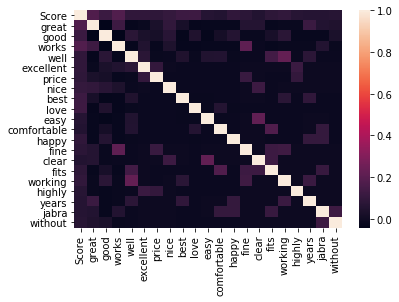

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

# Grab and process the raw data.
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['great','good','works','well','excellent','price','nice','best','love',
            'easy','comfortable','happy','fine','clear','fits','working','highly','years',
            'jabra', 'without']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
print(bnb.score(data,target))

# Display our results.
corr_pos = 0
false_pos = 0
corr_neg = 0
false_neg = 0
for i in range(len(target)):
    if ((target[i] == 1)&(y_pred[i]==1)):
        corr_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==1)):
        false_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==0)):
        corr_neg += 1
    else:
        false_neg += 1

confus_matrix = [[corr_neg,false_pos],[false_neg,corr_pos]]
print(confus_matrix)
print("Sensitivity : {}".format(round(corr_pos*100/(false_neg+corr_pos)),2))
print("Specificity : {}".format(round(corr_neg*100/(false_pos+corr_neg)),2))
print(cross_val_score(bnb, data, target, cv=10))
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**#2 - Using NEGATIVE keywords to predict score of Amazon Review**

Using the top 20 words with negative associations, 35% of the points are mislabeled, 298 of which were incorrectly categorized as positive reviews and 51 of which were incorrectly categorized as negative reviews.

0.650650650651
[[201, 298], [51, 449]]
Sensitivity : 90
Specificity : 40
[ 0.68        0.59        0.68        0.66        0.63        0.61        0.65
  0.63        0.68        0.64646465]
Number of mislabeled points out of a total 999 points : 349
Percent points mislabeled : 35.0


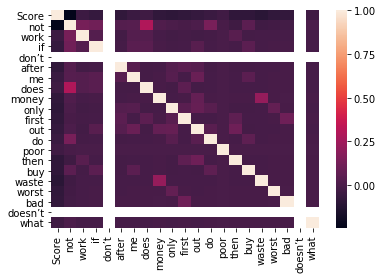

In [45]:
# Grab and process the raw data.
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['not','work','if','don’t','after','me','does','money','only',
            'first','out','do','poor','then','buy','waste','worst','bad','doesn’t','what']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
print(bnb.score(data,target))

# Display our results.
corr_pos = 0
false_pos = 0
corr_neg = 0
false_neg = 0
for i in range(len(target)):
    if ((target[i] == 1)&(y_pred[i]==1)):
        corr_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==1)):
        false_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==0)):
        corr_neg += 1
    else:
        false_neg += 1
        
confus_matrix = [[corr_neg,false_pos],[false_neg,corr_pos]]
print(confus_matrix)
print("Sensitivity : {}".format(round(corr_pos*100/(false_neg+corr_pos)),2))
print("Specificity : {}".format(round(corr_neg*100/(false_pos+corr_neg)),2))
print(cross_val_score(bnb, data, target, cv=10))
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**#3 - Using POSITIVE and NEGATIVE keywords to predict score of Amazon Review**

Using the top 20 positive words and top 20 negative words, 32% of the points are mislabeled, 17 of which were incorrectly categorized as positive reviews and 303 of which were incorrectly categorized as negative reviews. This means that the addition of 20 negative words decreased the number of reviews incorrectly categorized as positive by 11, but increased the number of reviews incorrectly categorized as negative by 5, resulting in a net reduction of 6 mislabeled reviews.

0.67967967968
[[482, 17], [303, 197]]
Sensitivity : 39
Specificity : 97
[ 0.69        0.65        0.69        0.69        0.72        0.62        0.72
  0.69        0.65        0.63636364]
Number of mislabeled points out of a total 999 points : 320
Percent points mislabeled : 32.0


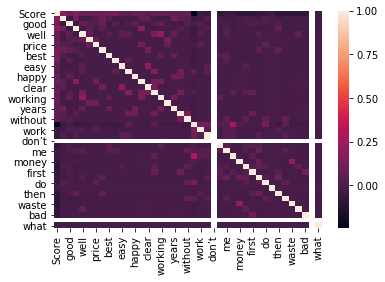

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['great','good','works','well','excellent','price','nice','best','love',
            'easy','comfortable','happy','fine','clear','fits','working','highly','years',
            'jabra', 'without','not','work','if','don’t','after','me','does','money','only',
            'first','out','do','poor','then','buy','waste','worst','bad','doesn’t','what']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
print(bnb.score(data,target))

# Display our results.
corr_pos = 0
false_pos = 0
corr_neg = 0
false_neg = 0
for i in range(len(target)):
    if ((target[i] == 1)&(y_pred[i]==1)):
        corr_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==1)):
        false_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==0)):
        corr_neg += 1
    else:
        false_neg += 1
        
confus_matrix = [[corr_neg,false_pos],[false_neg,corr_pos]]
print(confus_matrix)
print("Sensitivity : {}".format(round(corr_pos*100/(false_neg+corr_pos)),2))
print("Specificity : {}".format(round(corr_neg*100/(false_pos+corr_neg)),2))
print(cross_val_score(bnb, data, target, cv=10))
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**#4 - Changing 'binarize' parameter in BernoulliNB**

According to the Sklearn documentation, the 'binary' parameter is the "Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors."

* Changing from '0' to '1' - caused the model to predict that all reviews are positive. In actuality, 50% of the reviews are negative and therefore changing this parameter caused 50% of the points to be mislabeled, as 499 of the points were falsely categorized as positive reviews. This result was repeated for any value of 1 or greater.
* Changing from '0' to any nonzero, positive value less than '1' - No change. 32% (320 points) of points are mislabeled.

{'alpha': 1.0, 'binarize': 0.8, 'class_prior': None, 'fit_prior': True}
0.67967967968
[[482, 17], [303, 197]]
Sensitivity : 39
Specificity : 97
[ 0.69        0.65        0.69        0.69        0.72        0.62        0.72
  0.69        0.65        0.63636364]
Number of mislabeled points out of a total 999 points : 320
Percent points mislabeled : 32.0


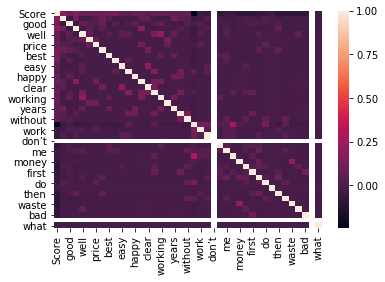

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['great','good','works','well','excellent','price','nice','best','love',
            'easy','comfortable','happy','fine','clear','fits','working','highly','years',
            'jabra', 'without','not','work','if','don’t','after','me','does','money','only',
            'first','out','do','poor','then','buy','waste','worst','bad','doesn’t','what']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB(alpha=1.0, binarize=0.8, fit_prior=True, class_prior=None)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
print(bnb.get_params())
print(bnb.score(data,target))

# Display our results.
corr_pos = 0
false_pos = 0
corr_neg = 0
false_neg = 0
for i in range(len(target)):
    if ((target[i] == 1)&(y_pred[i]==1)):
        corr_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==1)):
        false_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==0)):
        corr_neg += 1
    else:
        false_neg += 1
        
confus_matrix = [[corr_neg,false_pos],[false_neg,corr_pos]]
print(confus_matrix)
print("Sensitivity : {}".format(round(corr_pos*100/(false_neg+corr_pos)),2))
print("Specificity : {}".format(round(corr_neg*100/(false_pos+corr_neg)),2))
print(cross_val_score(bnb, data, target, cv=10))
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**#5 - Changing 'class_prior' parameter in BernoulliNB**

According to the Sklearn documentation, the 'class_prior' parameter is the "Prior probabilities of the classes. If specified the priors are not adjusted according to the data."

* Changing from 'None' to '[0.9,0.1]' - increased number of mislabeled points to 384 (all false negatives)
* Changing from 'None' to '[0.8,0.2]' - increased number of mislabeled points to 358 (357 false negatives and 1 false positive)
* Changing from 'None' to '[0.7,0.3]' - increased number of mislabeled points to 321 (306 false negatives and 15 false positive)
* Changing from 'None' to '[0.3,0.7]' - increased number of mislabeled points to 347 (21 false negatives and 326 false positive)

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': [0.3, 0.7], 'fit_prior': True}
0.652652652653
[[173, 326], [21, 479]]
Sensitivity : 96
Specificity : 35
[ 0.68        0.6         0.68        0.65        0.64        0.6         0.66
  0.62        0.68        0.66666667]
Number of mislabeled points out of a total 999 points : 347
Percent points mislabeled : 35.0


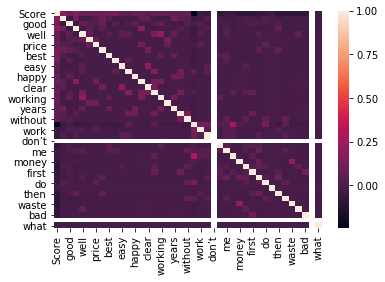

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Grab and process the raw data.
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t")
df.columns = ['Review', 'Score']
 
keywords = ['great','good','works','well','excellent','price','nice','best','love',
            'easy','comfortable','happy','fine','clear','fits','working','highly','years',
            'jabra', 'without','not','work','if','don’t','after','me','does','money','only',
            'first','out','do','poor','then','buy','waste','worst','bad','doesn’t','what']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    df[str(key)] = df.Review.str.contains(' ' + str(key) + ' ',case=False)

sns.heatmap(df.corr())

data = df[keywords]
target = df['Score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=[0.3,0.7])
#bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
print(bnb.get_params())
print(bnb.score(data,target))

# Display our results.
corr_pos = 0
false_pos = 0
corr_neg = 0
false_neg = 0
for i in range(len(target)):
    if ((target[i] == 1)&(y_pred[i]==1)):
        corr_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==1)):
        false_pos += 1
    elif ((target[i] == 0)&(y_pred[i]==0)):
        corr_neg += 1
    else:
        false_neg += 1
        
confus_matrix = [[corr_neg,false_pos],[false_neg,corr_pos]]
print(confus_matrix)
print("Sensitivity : {}".format(round(corr_pos*100/(false_neg+corr_pos)),2))
print("Specificity : {}".format(round(corr_neg*100/(false_pos+corr_neg)),2))
print(cross_val_score(bnb, data, target, cv=10))
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
print("Percent points mislabeled : {}".format(round((target != y_pred).sum()*100/data.shape[0]),2))

**Evaluation Questions**

1. Do any of your classifiers seem to overfit? After reviewing the cross validation outputs, there may be some slight over-fitting, as the accuracy varies from 0.62 to 0.72 for the classifiers 1, 3 and 4. The accuracy for classifier #2 varies from 0.59 to 0.68.The accuracy for classifier #5 varies from 0.6 to 0.68.
2. Which seem to perform the best? Why? Classifier #3 appears to perform the best, as it has the highest accuracy with 320 mislabeled points.
3. Which features seemed to be most impactful to performance? Correct input parameters (such as binarize < 1) impacted whether the model worked at all or not, but really weren't useful for fine-tuning. The greatest impact on performance appeared to be careful selection of keywords.